# Clase V. curso 2020-2021. Emanuele Schiavi
recordamos un metodo directo 4.2.3 regresion lineal ej quarteroni

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

from sympy import *

In [2]:
A = np.array([[ 0,      1],
              [0.06,   1],
              [0.14,   1],
              [0.25,   1],
              [0.31,   1],
              [0.47,   1],
              [0.60,   1],
              [0.70,   1]])
m, n = A.shape
b = np.array([[0], [0.08], [0.14], [0.20], [0.23], [0.25], [0.28], [0.29]])

# no existencia
rango = np.linalg.matrix_rank(A)
rango_amp = np.linalg.matrix_rank(np.concatenate([A, b],-1))
print('Rango A')
display(rango)
print('Rango A ampliada')
display(rango_amp)

Rango A


2

Rango A ampliada


3

In [3]:
# Calculo solucion de minimos cuadrados
Q, R = np.linalg.qr(A, mode='reduced')
print('Q')
display(Q)
print('R')
display(R)
xstar = np.linalg.pinv(R) @ (Q.transpose()@b)
xp = np.linalg.pinv(A)@b
print('xstar')
display(xstar)
print('xp')
display(xp)

Q


array([[ 0.        , -0.58820304],
       [-0.05360777, -0.51692563],
       [-0.12508479, -0.42188907],
       [-0.22336569, -0.2912138 ],
       [-0.27697346, -0.21993638],
       [-0.4199275 , -0.02986327],
       [-0.53607766,  0.12457114],
       [-0.62542394,  0.24336684]])

R


array([[-1.11924081, -2.26046081],
       [ 0.        , -1.70009321]])

xstar


array([[0.37409893],
       [0.06544121]])

xp


array([[0.37409893],
       [0.06544121]])

x_QR


array([[0.37409893],
       [0.06544121]])

tiempo_QR


0.00015854835510253906

x_directo


/tmp/ipykernel_17274/2288081558.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_directo = np.linalg.lstsq(A, b)[0]


array([[0.37409893],
       [0.06544121]])

tiempo_directo


0.00029730796813964844

xp


array([[0.37409893],
       [0.06544121]])

tiempo_pinv


0.0001404285430908203

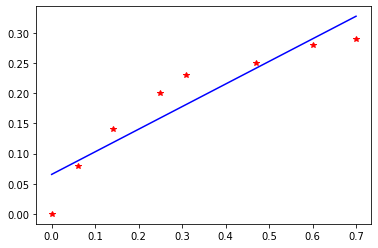

In [4]:
import time
# metodos y tiempos
t = time.time()
x_QR = np.linalg.pinv(R) @ (Q.transpose()@b)
tiempo_QR = time.time() - t

print('x_QR')
display(x_QR)
print('tiempo_QR')
display(tiempo_QR)

t = time.time()
x_directo = np.linalg.lstsq(A, b)[0]
tiempo_directo = time.time() - t

print('x_directo')
display(x_directo)
print('tiempo_directo')
display(tiempo_directo)

t = time.time()
xp = np.linalg.pinv(A) @ b
tiempo_pinv = time.time() - t

print('xp')
display(xp)
print('tiempo_pinv')
display(tiempo_pinv)


fig = plt.figure()

plt.plot(A[:,0], b, 'r*')
plt.plot(A[:,0], A@x_QR, 'b')
plt.show()


## Ejemplo 5.1: no hay rango maximo

In [5]:
A = np.array([[1, 1], [1, 1]])
b= np.array([[2],[0]])
m, n = A.shape

rango = np.linalg.matrix_rank(A)
print('Rango de A')
display(rango)



Rango de A


1

In [6]:
x_pinv = np.linalg.pinv(A)@b
display(x_pinv)

# Calculo pinv via SVD
U, S, V = np.linalg.svd(A)
S = np.diag(S)
S_p = np.linalg.pinv(S)

algoritmo= V@S_p@U.transpose()
print('Algoritmo')
display(algoritmo)

# calculo pseudo inversa via pinv
A_p = np.linalg.pinv(A)
print('A_p')
display(A_p)

B1 = A_p@A # =VV' no es la inversa izq
B2 = A@A_p # =UU'  no es la inversa derecha

import traceback
try:
    f1 = np.linalg.inv(A.transpose()@A)@A.transpose() # vale para rank=n
except Exception:
    display(traceback.print_exc())

try:
    f2 = A.transpose()@np.linalg.inv(A@A.transpose()) # vale para rank=m
except Exception:
    display(traceback.print_exc())

array([[0.5],
       [0.5]])

Algoritmo


array([[0.25, 0.25],
       [0.25, 0.25]])

A_p


array([[0.25, 0.25],
       [0.25, 0.25]])

Traceback (most recent call last):
  File "/tmp/ipykernel_17274/3315505688.py", line 23, in <module>
    f1 = np.linalg.inv(A.transpose()@A)@A.transpose() # vale para rank=n
  File "<__array_function__ internals>", line 5, in inv
  File "/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/numpy/linalg/linalg.py", line 545, in inv
    ainv = _umath_linalg.inv(a, signature=signature, extobj=extobj)
  File "/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/numpy/linalg/linalg.py", line 88, in _raise_linalgerror_singular
    raise LinAlgError("Singular matrix")
numpy.linalg.LinAlgError: Singular matrix


None

Traceback (most recent call last):
  File "/tmp/ipykernel_17274/3315505688.py", line 28, in <module>
    f2 = A.transpose()@np.linalg.inv(A@A.transpose()) # vale para rank=m
  File "<__array_function__ internals>", line 5, in inv
  File "/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/numpy/linalg/linalg.py", line 545, in inv
    ainv = _umath_linalg.inv(a, signature=signature, extobj=extobj)
  File "/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/numpy/linalg/linalg.py", line 88, in _raise_linalgerror_singular
    raise LinAlgError("Singular matrix")
numpy.linalg.LinAlgError: Singular matrix


None

In [7]:
# regularizacion
epsilon = symbols('\epsilon')

A_r = Matrix(A.transpose()@A + epsilon*np.eye(n))
A_s = Matrix(A@A.transpose() + epsilon*np.eye(n))
print('A_r')
display(A_r)
print('A_s')
display(A_s)

Ainv_r = A_r.inv()
Ainv_s = A_s.inv()

print('Ainv_r')
display(Ainv_r)
print('Ainv_s')
display(Ainv_s)

L1_00 = limit((Ainv_r*A.transpose())[0,0], epsilon, 0)
L1_01 = limit((Ainv_r*A.transpose())[0,1], epsilon, 0)
L1_10 = limit((Ainv_r*A.transpose())[1,0], epsilon, 0)
L1_11 = limit((Ainv_r*A.transpose())[1,1], epsilon, 0)

fila1 = Matrix([L1_00]).col_insert(1, Matrix([L1_01]))
fila2 = Matrix([L1_10]).col_insert(1, Matrix([L1_11]))

res = fila1.row_insert(1,fila2)
print('A_inv derecha')
display(res)

L2_00 = limit((A.transpose()*Ainv_s)[0,0], epsilon, 0)
L2_01 = limit((A.transpose()*Ainv_s)[0,1], epsilon, 0)
L2_10 = limit((A.transpose()*Ainv_s)[1,0], epsilon, 0)
L2_11 = limit((A.transpose()*Ainv_s)[1,1], epsilon, 0)

fila1 = Matrix([L2_00]).col_insert(1, Matrix([L2_01]))
fila2 = Matrix([L2_10]).col_insert(1, Matrix([L2_11]))

res = fila1.row_insert(1,fila2)
print('A_inv izquierda')

display(res)

A_r


Matrix([
[1.0*\epsilon + 2,                2],
[               2, 1.0*\epsilon + 2]])

A_s


Matrix([
[1.0*\epsilon + 2,                2],
[               2, 1.0*\epsilon + 2]])

Ainv_r


Matrix([
[(2.0*\epsilon + 4.0)/(2.0*\epsilon**2 + 8.0*\epsilon),                   4/(-2.0*\epsilon**2 - 8.0*\epsilon)],
[                  2/(-1.0*\epsilon**2 - 4.0*\epsilon), (1.0*\epsilon + 2.0)/(1.0*\epsilon**2 + 4.0*\epsilon)]])

Ainv_s


Matrix([
[(2.0*\epsilon + 4.0)/(2.0*\epsilon**2 + 8.0*\epsilon),                   4/(-2.0*\epsilon**2 - 8.0*\epsilon)],
[                  2/(-1.0*\epsilon**2 - 4.0*\epsilon), (1.0*\epsilon + 2.0)/(1.0*\epsilon**2 + 4.0*\epsilon)]])

A_inv derecha


Matrix([
[0.25, 0.25],
[0.25, 0.25]])

A_inv izquierda


Matrix([
[0.25, 0.25],
[0.25, 0.25]])

In [8]:
# Diferencias

print('Evaluamos las propiedades')
A = Matrix(A)

display((A-A*A.pinv()*A.transpose()).norm(ord='fro'))
display((A.pinv()-A.pinv()*A*A.pinv()).norm(ord='fro'))
display(((A*A.pinv()).transpose()-A*A.pinv()).norm(ord='fro'))
display(((A.pinv()*A).transpose()-A.pinv()*A).norm(ord='fro'))



Evaluamos las propiedades


0

0

0

0

# Master Regresión

Sistema Sobredeterminado n features


In [9]:
m = 15000 # ejemplos
n = 4     # caracteristicas
X = np.random.rand(m,n) # matriz de diseño: m ejemplos como vectores de dim n

y_train = np.random.rand(m,1) # etiquetas

# Calculo solucion de minimos cuadrados via factorizacion QR
Q, R = np.linalg.qr(X)  # Q ortogonal R trapezoidal X=QR

# resolucion: Pesos
t = time.time()
w0 = np.linalg.lstsq(X,y_train)[0]
tiempo_lstsq = time.time() - t

print('w0')
display(w0)
print('tiempo_lstsq')
display(tiempo_lstsq)


t = time.time()
w1 = np.linalg.pinv(R) @ (Q.transpose()@y_train)
tiempo_qr = time.time() - t

print('w1')
display(w1)
print('tiempo_qr')
display(tiempo_qr)

t = time.time()
w2 = np.linalg.inv(X.transpose()@X)@X.transpose()@ y_train
tiempo_pinv_formula = time.time() - t

print('w2')
display(w2)
print('tiempo_pinv_formula')
display(tiempo_pinv_formula)

t = time.time()
w3 = np.linalg.pinv(X) @ y_train
tiempo_pinv = time.time() - t

print('w3')
display(w3)
print('tiempo_pinv')
display(tiempo_pinv)



w0


/tmp/ipykernel_17274/3499141374.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w0 = np.linalg.lstsq(X,y_train)[0]


array([[0.23836815],
       [0.22794765],
       [0.22718622],
       [0.23223342]])

tiempo_lstsq


0.0007960796356201172

w1


array([[0.23836815],
       [0.22794765],
       [0.22718622],
       [0.23223342]])

tiempo_qr


0.003041505813598633

w2


array([[0.23836815],
       [0.22794765],
       [0.22718622],
       [0.23223342]])

tiempo_pinv_formula


0.00027871131896972656

w3


array([[0.23836815],
       [0.22794765],
       [0.22718622],
       [0.23223342]])

tiempo_pinv


0.0010302066802978516

In [10]:
# Prediccion
ejemplo = np.random.rand(n,1)
prediccion=w1.transpose()@ejemplo
display(prediccion)

array([[0.52929508]])

Sistema Sobredeterminado: 1 feature Caso 1D

In [11]:
m = 10  # ejemplos
n = 1   # caracteristicas
X = np.random.rand(m,n) # matriz de diseño: m ejemplos como vectores de dim n
y_train = np.random.rand(m,1) # etiquetas

# Calculo solucion de minimos cuadrados via factorizacion QR
Q, R = np.linalg.qr(X) # Q ortogonal R trapezoidal X=QR

# resolucion: Pesos
t = time.time()
w0 = np.linalg.lstsq(X,y_train)[0]
tiempo_lstsq = time.time() - t

print('w0')
display(w0)
print('tiempo_lstsq')
display(tiempo_lstsq)


t = time.time()
w1 = np.linalg.pinv(R) @ (Q.transpose()@y_train)
tiempo_qr = time.time() - t

print('w1')
display(w1)
print('tiempo_qr')
display(tiempo_qr)

t = time.time()
w2 = np.linalg.inv(X.transpose()@X)@X.transpose()@ y_train
tiempo_pinv_formula = time.time() - t

print('w2')
display(w2)
print('tiempo_pinv_formula')
display(tiempo_pinv_formula)

t = time.time()
w3 = np.linalg.pinv(X) @ y_train
tiempo_pinv = time.time() - t

print('w3')
display(w3)
print('tiempo_pinv')
display(tiempo_pinv)

w0


/tmp/ipykernel_17274/2770223054.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w0 = np.linalg.lstsq(X,y_train)[0]


array([[0.52826683]])

tiempo_lstsq


0.0002791881561279297

w1


array([[0.52826683]])

tiempo_qr


0.00016164779663085938

w2


array([[0.52826683]])

tiempo_pinv_formula


9.679794311523438e-05

w3


array([[0.52826683]])

tiempo_pinv


0.0001373291015625

In [12]:
# Prediccion
ejemplo = np.random.rand(n,1)
prediccion=w1.transpose()@ejemplo
display(prediccion)

array([[0.05326891]])

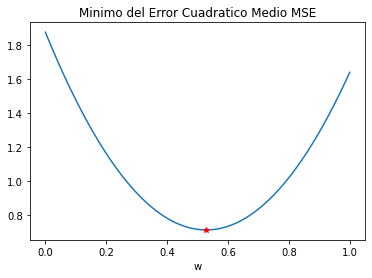

In [13]:
w = symbols('w', real=True)

N = Matrix((X@[[w]]-y_train)).norm()**2
x = np.linspace(0, 1, 1000)
N_np = lambdify(w, N)

fig = plt.figure()
ax = plt.axes()
ax.plot(x, N_np(x))
ax.plot(w1.squeeze(), N.subs(w,w1.squeeze()), 'r*')
ax.set_xlabel('w')
ax.set_title('Minimo del Error Cuadratico Medio MSE') 
plt.show()

Sistema Sobredeterminado 2 feature Caso 2D

In [14]:
m = 10 # ejemplos
n = 2  # caracteristicas
X = np.random.rand(m,n) # matriz de diseño: m ejemplos como vectores de dim n
y_train = np.random.rand(m,1) # etiquetas


In [15]:
# Calculo solucion de minimos cuadrados via factorizacion QR
Q, R = np.linalg.qr(X) # Q ortogonal R trapezoidal X=QR

# resolucion: Pesos
p_1 = np.linalg.pinv(R) @ (Q.transpose()@y_train)

p_2 = np.linalg.inv(X.transpose()@X)@X.transpose()@y_train

p_3 = np.linalg.pinv(X)@y_train


In [16]:
# Prediccion
ejemplo = np.random.rand(n,1)

prediccion = p_1.transpose()@ejemplo
prediccion

array([[0.18168072]])

In [17]:
prediccion = p_2.transpose()@ejemplo
prediccion

array([[0.18168072]])

In [18]:
prediccion = p_3.transpose()@ejemplo
prediccion

array([[0.18168072]])

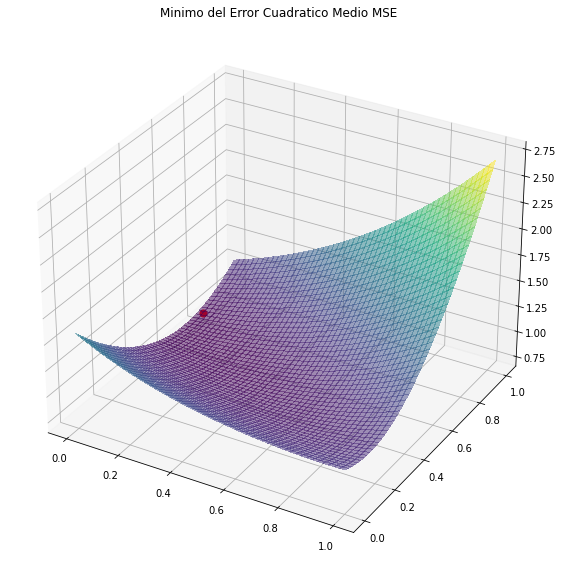

In [19]:
w0, w1 = symbols('w:2', real=True)
W = np.array([[w0], [w1]])

N = Matrix((X@W-y_train)**2).norm()
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)

N_np = lambdify((w0,w1), N)#(x,y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# Make data.
x_m, y_m = np.meshgrid(x,y)

# Plot the surface.
ax.plot_surface(x_m, y_m, N_np(x_m,y_m), cmap='viridis',
                       linewidth=0, antialiased=False, alpha=0.5)

z = np.asarray([N.subs({w0:p_1[0].squeeze(), w1:p_1[1].squeeze()})], np.float32)
ax.scatter3D(p_1[0],p_1[1], z, c='r', s=50)
plt.title('Minimo del Error Cuadratico Medio MSE') 
plt.show()

# Propuesto 5.1

In [20]:
# clear all
A = np.array([[2, -1],
              [0,  1],
              [1,  0],
              [-1, 2]])
b = np.array([[1],[0],[2],[4]])

m, n = A.shape

# no existencia
rango = np.linalg.matrix_rank(A)
rango_amp = np.linalg.matrix_rank(np.concatenate([A, b],-1))
